# Solution path for the `Riboflavin` data set

The data set can be downloaded from <https://www.annualreviews.org/doi/suppl/10.1146/annurev-statistics-022513-115545>.

In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from timeit import default_timer as timer

sys.path.append('../..')
from modules import full_path, path_solver, dual_sorted_L1_norm as dual_norm, pattern

In [4]:
# Import of the data set
ribo = pd.read_csv('../datasets/riboflavin.csv', sep=',', index_col=0).T
data = ribo.drop(columns='q_RIBFLV')
target = ribo['q_RIBFLV']

In [5]:
# Setting (and data standardization)
X = data.to_numpy(dtype=float)
X_mean = X.mean(axis=0)
X_std = X.std(axis=0, ddof=0)
X = (X - X_mean) / X_std

y = target.to_numpy(dtype=float)
y_mean = y.mean()
y = y - y_mean 

Lambda = np.linspace(4,1,X.shape[-1],dtype=float)

In [6]:
# Numba compilation
_ = full_path(X, y , Lambda, ratio=0., k_max=0., rtol_pattern=1e-6, atol_pattern = 1e-6, rtol_gamma=1e-6, split_max=1e1, log=0)
_ = path_solver(X, y, Lambda, k_max=0., rtol_pattern=1e-6, atol_pattern = 1e-6, rtol_gamma=1e-6, split_max=1e1, log=0)

In [13]:
# (Almost) full path (ratio of it)
Gamma, Sol, Primal, Gap, M, Split, T = full_path(X, y , Lambda, ratio=0.98, k_max=1e4, rtol_pattern=1e-10, atol_pattern = 1e-10, rtol_gamma=1e-10, split_max=1e1, log=1)

node 0: gamma = 10.533, elapsed time = 3.70e-03s, gap = 0.00e+00
node 1: gamma = 9.625, elapsed time = 9.18e-03s, gap = -3.55e-15
node 2: gamma = 9.251, elapsed time = 1.40e-02s, gap = -3.55e-15
node 3: gamma = 8.146, elapsed time = 1.86e-02s, gap = 7.11e-15
node 4: gamma = 6.951, elapsed time = 2.27e-02s, gap = 3.55e-15
node 5: gamma = 6.268, elapsed time = 2.61e-02s, gap = 3.55e-15
node 6: gamma = 6.258, elapsed time = 2.90e-02s, gap = 7.11e-15
node 7: gamma = 6.228, elapsed time = 3.29e-02s, gap = 3.55e-15
node 8: gamma = 6.050, elapsed time = 3.61e-02s, gap = 1.07e-14
node 9: gamma = 6.038, elapsed time = 3.98e-02s, gap = 3.55e-15
node 10: gamma = 6.031, elapsed time = 4.19e-02s, gap = 7.11e-15
node 11: gamma = 6.021, elapsed time = 4.43e-02s, gap = 0.00e+00
node 12: gamma = 5.861, elapsed time = 4.65e-02s, gap = 1.42e-14
node 13: gamma = 5.846, elapsed time = 4.88e-02s, gap = 7.11e-15
node 14: gamma = 5.407, elapsed time = 5.06e-02s, gap = 0.00e+00
node 15: gamma = 5.398, elapsed 

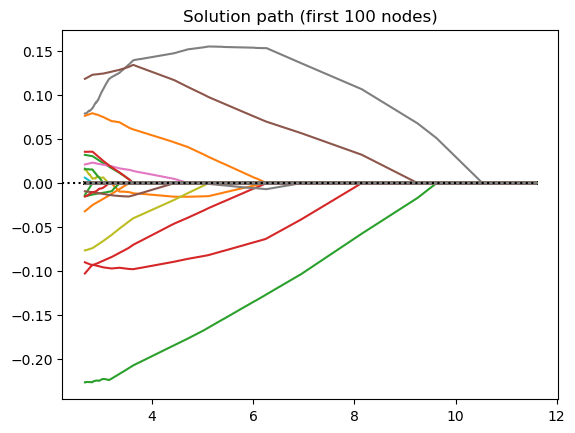

In [21]:
# Solution path
K = 100
fig, ax = plt.subplots()
ax.plot([1.1*Gamma[0]] + Gamma[:K], [Sol[0]] + Sol[:K])
# for gamma in Gamma[:K]:
#     ax.axvline(gamma, color='k', linestyle=':')
ax.axhline(0, color='k', linestyle=':', xmax=0.95)
# ax.set_xscale('symlog')
ax.set_title(f'Solution path (first {K} nodes)')
plt.show() 

In [22]:
# Solver 
frac = 0.5; gamma = frac*dual_norm(X.T@y, Lambda)
t_start = timer()
sol, (primal, gap) = path_solver(X, y , gamma*Lambda, k_max=1e3, rtol_pattern=1e-10, atol_pattern = 1e-10, rtol_gamma=1e-10, split_max=1e1, log=0)
print(f'pattern for {frac} x gamma_max: {pattern(sol, tol=1e-10)}')
print(f'elapsed time = {timer() - t_start:.2e}s, primal-dual gap = {gap:.2e}')

pattern for 0.5 x gamma_max: [0 0 0 ... 0 0 0]
elapsed time = 5.11e-02s, primal-dual gap = 3.55e-15
